# China's One Child Policy

At what point are there too many men?


In [12]:
%matplotlib inline

from modsim import *

In [13]:
import pandas as pd
data = pd.read_csv("C:/Users/rwon/Documents/ModSim/Date_Range.csv",  index_col='Year', low_memory=False) / 1e8
data

,Population
Year,
1985,10.51040
1986,10.66790
1987,10.84035
1988,11.01630
1989,11.18650
1990,11.35185
1991,11.50780
1992,11.64970
1993,11.78440


In [20]:
system = System(death_rate = 0.6,
                probOfBeingBoy = 0.1,
                old_pop0 = 4.906175,
                young_pop0 = 4.906175,
                ageWhenMature = 18,
                youngMale0 = 2.4530875,
                youngFemale0 = 2.4530875,
                oldMale0 = 2.4530875,
                oldFemale0 = 2.4530875,
                fertilityRate = 1.6) #age at which young -> old and has a baby

systemSingle = System(t0 = 1985, 
                      t_end = 2010)
system

,value
death_rate,0.600000
probOfBeingBoy,0.100000
old_pop0,4.906175
young_pop0,4.906175
ageWhenMature,18.000000
youngMale0,2.453088
youngFemale0,2.453088
oldMale0,2.453088
oldFemale0,2.453088
fertilityRate,1.600000


In [21]:
systemSingle

,value
t0,1985
t_end,2010


In [22]:
""""people = [[],[],[],[],[],[],[]] #creating a list series
youngMale = people[0]
youngFemale = people[1]
youngTotal = people[2]
oldMale = people[3]
oldFemale = people[4]
oldTotal = people[5]
population = people[6]

youngMale = [None]*max(systemSingle.t_end)
youngFemale = [None]*max(systemSingle.t_end)
youngTotal = [None]*max(systemSingle.t_end)
oldMale = [None]*max(systemSingle.t_end)
oldFemale = [None]*max(systemSingle.t_end)
oldTotal = [None]*max(systemSingle.t_end)
population = [None]*max(systemSingle.t_end)

oldTotal""""

SyntaxError: EOL while scanning string literal (<ipython-input-22-c1f82778562e>, line 18)

In [23]:
beforePolicy=[7.54550, 7.74510,7.96025,8.18315,8.41105,8.62030,8.81940,9.00350,9.16395,9.30685,9.43455,9.56165,9.69005,9.81235,9.93885,10.08630,10.23310,10.36825]
beforePolicy

[7.5455,
 7.7451,
 7.96025,
 8.18315,
 8.41105,
 8.6203,
 8.8194,
 9.0035,
 9.16395,
 9.30685,
 9.43455,
 9.56165,
 9.69005,
 9.81235,
 9.93885,
 10.0863,
 10.2331,
 10.36825]

In [32]:
def run_simulation(system):
 #   people = [[],[],[],[],[],[]] #creating a list series
    youngMale = TimeSeries()
    youngFemale = TimeSeries()
    youngTotal = TimeSeries()
    oldMale = TimeSeries()
    oldFemale = TimeSeries()
    oldTotal = TimeSeries()
   # population = people[6]
    population = TimeSeries()

   # youngMale = [None]*max(systemSingle.t_end+2)
   # youngFemale = [None]*max(systemSingle.t_end+2)
   # youngTotal = [None]*max(systemSingle.t_end+2)
   # oldMale = [None]*max(systemSingle.t_end+2)
   # oldFemale = [None]*max(systemSingle.t_end+2)
   # oldTotal = [None]*max(systemSingle.t_end+2)
   #population = [None]*max(system.t_end+2)

    oldTotal[systemSingle.t0] = system.old_pop0
    youngTotal[systemSingle.t0] = system.young_pop0
    youngMale[systemSingle.t0] = system.youngMale0
    youngFemale[systemSingle.t0] = system.youngFemale0
    oldMale[systemSingle.t0] = system.oldMale0
    oldFemale[systemSingle.t0] = system.oldFemale0
    population[systemSingle.t0] = system.old_pop0 + system.young_pop0
    
    
    for t in range(systemSingle.t0, systemSingle.t_end):
        i = 0
        
        if t < (systemSingle.t0 + system.ageWhenMature):
            maturationsGirls = beforePolicy[i]/2
            maturationsBoys = beforePolicy[i]/2
            
            babiesNextYear = maturationsGirls
            
            youngMale[t+1] = babiesNextYear*system.probOfBeingBoy + youngMale[t]
            youngFemale[t+1] = babiesNextYear - youngMale[t+1] + youngFemale[t]
            youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] + youngTotal[t]
            
            deaths = system.death_rate * oldTotal[t]
            
            oldFemale[t+1] = maturationsGirls + oldFemale[t] - deaths/2
            oldMale[t+1] = maturationsBoys + oldMale[t] - deaths/2
            oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]
            population[t+1] = youngTotal[t+1] + oldTotal[t+1]
            
            i+=1
            
            
        else:
            maturationsGirls = youngFemale[int(t - system.ageWhenMature)]
            maturationsBoys = youngMale[int(t - system.ageWhenMature)]
            
            babiesNextYear = maturationsGirls
            
            youngMale[t+1] = babiesNextYear*system.probOfBeingBoy + youngMale[t] - maturationsBoys
            youngFemale[t+1] = babiesNextYear - youngMale[t+1] + youngFemale[t] - maturationsGirls
            youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] + youngTotal[t]
            
            deaths = system.death_rate * oldTotal[t]
            
            oldFemale[t+1] = maturationsGirls + oldFemale[t] - deaths/2
            oldMale[t+1] = maturationsBoys + oldMale[t] - deaths/2
            oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]
            
            population[t+1] = youngTotal[t+1] + oldTotal[t+1]
           
    system.population = population
    system.youngMale = youngMale
    system.youngFemale = youngFemale
    system.youngTotal = youngTotal
    system.oldMale = oldMale
    system.oldFemale = oldFemale
    system.oldTotal = oldTotal


Test your changes in `run_simulation`:

In [33]:
run_simulation(system)
system.youngFemale
#system.population

,value
1985,2.453088
1986,3.395475
1987,3.960587
1988,4.148425
1989,3.958987
1990,3.392275
1991,2.448287
1992,1.127025
1993,-0.571513
1994,-2.647325


In [34]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(data, '--', color='green', label='China Population')
    plot(system.population, 'bo-', label='population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)


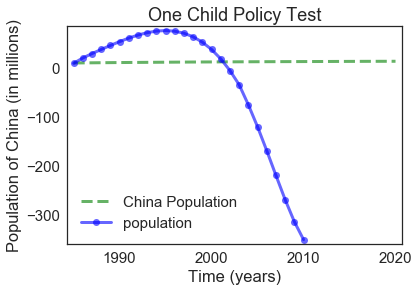

In [35]:
plot_results(system, title='One Child Policy Test')

In [6]:
help(plot)

Help on function plot in module modsim:

plot(*args, **kwargs)
    Makes line plots.
    
    args can be:
      plot(y)
      plot(y, style_string)
      plot(x, y)
      plot(x, y, style_string)
    
    kwargs are the same as for pyplot.plot
    
    If x or y have attributes label and/or units,
    label the axes accordingly.



In [7]:
help(TimeSeries)

Help on class TimeSeries in module modsim:

class TimeSeries(MySeries)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same length as `data`.
 |      Non-unique index values are allowed. Will default to
 |      RangeIndex(len(